![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [95]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [96]:
df.shape

(7565, 7)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [98]:
import numpy as np

df.price = df.price.replace('Договорная', np.nan).astype(float)

In [99]:
df['size'] = df['size'].replace('Площадьземли:1сот', 100).astype(float)

In [100]:
# Group by 'district' and calculate the mean of 'price' for each group
price_mean = df.groupby('district')['price'].transform(lambda x: x.fillna(x.mean()))

df['price'] = df['price'].fillna(price_mean)

In [101]:
df.sort_values('price', ascending=False).head(50)

df.at[5903, 'price'] = df[df.district == 'Учтепинский'].price.mean()
df.at[6952, 'price'] = df[df.district == 'Шайхантахурский'].price.mean()
df.at[6952, 'price'] = df[df.district == 'Шайхантахурский'].price.mean()
df.at[7296, 'price'] = df[df.district == 'Яшнободский'].price.mean()
df.at[330, 'price'] = df[df.district == 'Яшнободский'].price.mean()
df.at[1744, 'price'] = df[df.district == 'Олмазорский'].price.mean()
df.at[6517, 'price'] = df[df.district == 'Юнусабадский'].price.mean()
df.at[6133, 'price'] = df[df.district == 'Юнусабадский'].price.mean()


df[df.district == 'Юнусабадский'].sort_values('price')

,location,district,rooms,size,level,max_levels,price
5176,"город Ташкент, Юнусабадский район, 1-й проезд ...",Юнусабадский,1,18.0,1,4,12500.0
4635,"город Ташкент, Юнусабадский район, 4-й проезд ...",Юнусабадский,1,21.0,4,4,12500.0
6681,"город Ташкент, Юнусабадский район, ТашГРЭС",Юнусабадский,1,24.0,7,10,13680.0
7408,"город Ташкент, Юнусабадский район, Юнусабад 2-...",Юнусабадский,1,32.0,3,4,16000.0
7392,"город Ташкент, Юнусабадский район, ТашГРЭС",Юнусабадский,1,25.0,1,2,17000.0
...,...,...,...,...,...,...,...
1968,"город Ташкент, Юнусабадский район, Киёт",Юнусабадский,6,252.0,1,8,285000.0
1934,"город Ташкент, Юнусабадский район, Кичик Халка...",Юнусабадский,5,280.0,6,8,320000.0
600,"город Ташкент, Юнусабадский район, Кашгар",Юнусабадский,3,110.0,5,8,335000.0
1557,"город Ташкент, Юнусабадский район, Минор",Юнусабадский,10,448.0,7,7,425600.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Юнусабадский'),
  Text(1, 0, 'Яккасарайский'),
  Text(2, 0, 'Чиланзарский'),
  Text(3, 0, 'Учтепинский'),
  Text(4, 0, 'Мирзо-Улугбекский'),
  Text(5, 0, 'Яшнободский'),
  Text(6, 0, 'Мирабадский'),
  Text(7, 0, 'Шайхантахурский'),
  Text(8, 0, 'Олмазорский'),
  Text(9, 0, 'Сергелийский'),
  Text(10, 0, 'Янгихаётский'),
  Text(11, 0, 'Бектемирский')])

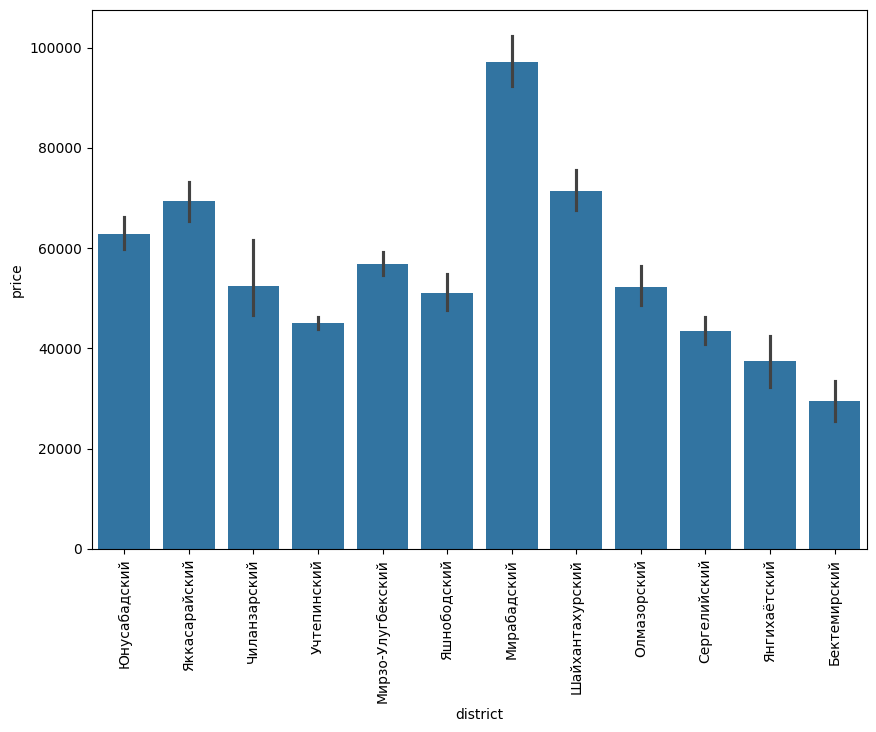

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.barplot(data=df, x='district', y='price')
plt.xticks(rotation=90)
# plt.show()

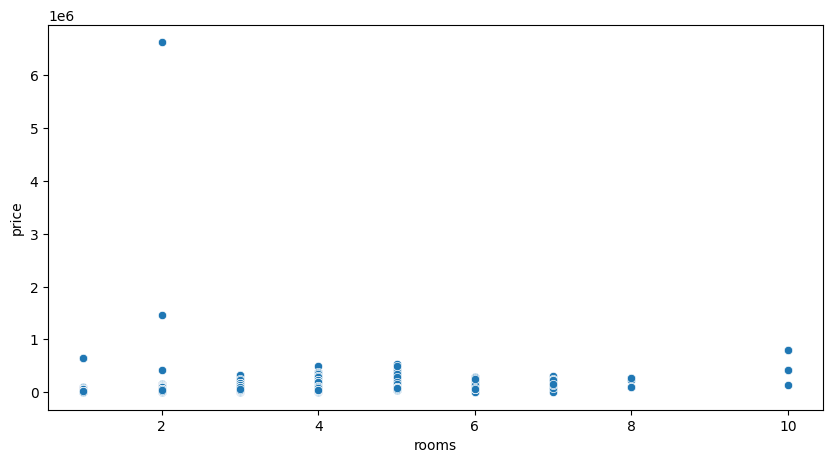

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(10, 5))

sns.scatterplot(data=df, x='rooms', y=df.price)
# sns.lineplot(data=df, x='rooms', y='price')


plt.show()

In [104]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df)